# Helpful Reviews

### Exploratory Data Analysis

### Corey J Wade

## Introduction

This Jupyter Notebook will present comparative exploratory data analysis of an Amazon Book Reviews dataset courtesy of Julian McAuley, UCSD: 

http://jmcauley.ucsd.edu/data/amazon/

## Open Dataset

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Open DataFrame
df = pd.read_csv('df.csv')

In [2]:
# View Full DataFrame
df.head()

,Unnamed: 0,index,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,...,Total_Votes,Helpful_Percentage,Review_Length,Sentence_Length,Word_Length,Helpful_Rating,Helpful_Votes_Scaled,Helpful_Percentage_Book_Score,Badge,Helpful?
0,0,1,000100039X,"[0, 2]",5.0,This is one my must have books. It is a master...,"12 11, 2003",A2S166WSCFIFP5,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",close to god,...,2,0.000000,268,9.800000,4.306122,0.010826,0.000000,0.541325,1,0
1,1,4,000100039X,"[7, 9]",5.0,A timeless classic. It is a very demanding an...,"10 7, 2002",A2XQ5LZHTD4AFT,Alaturka,A Modern Rumi,...,9,0.777778,813,13.818182,4.260000,0.797675,0.836220,0.545366,4,1
2,2,14,000100039X,"[1, 1]",5.0,I discovered The Prophet fifty years ago in co...,"01 23, 2013",A19N3FCQCLJYUA,Amazon Customer,A book everyone &#34;should&#34; read,...,1,1.000000,870,18.111111,4.148148,0.753353,0.434560,0.541903,4,1
3,3,15,000100039X,"[1, 1]",5.0,Can't say enough about Kahlil Gibran's work am...,"06 27, 2012",A3FFNE1DR5SI1W,A. Morelli,phenomenal piece of literature!,...,1,1.000000,427,11.833333,4.845070,0.753353,0.434560,0.541903,4,1
4,4,17,000100039X,"[3, 5]",5.0,"Anything I've read by Gibran is, in my mind, f...","11 16, 2005",A2X4HE21JTAL98,Antiquarian,Flawless,...,5,0.600000,485,16.000000,4.775000,0.631986,0.678869,0.543059,3,0


In [3]:
# Delete extraneous column from all dataframes
del df['Unnamed: 0']

In [4]:
df.describe()

,index,overall,unixReviewTime,Helpful_Votes,Total_Votes,Helpful_Percentage,Review_Length,Sentence_Length,Word_Length,Helpful_Rating,Helpful_Votes_Scaled,Helpful_Percentage_Book_Score,Badge,Helpful?
count,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06,4.756338e+06
mean,4.281655e+06,4.101044e+00,1.284901e+09,5.625667e+00,7.575643e+00,7.348979e-01,1.036185e+03,1.623846e+01,4.454504e+00,6.572302e-01,5.572892e-01,5.812982e-01,3.393917e+00,6.229618e-01
std,2.542118e+06,1.202299e+00,1.174243e+08,2.663631e+01,3.052654e+01,3.426306e-01,1.182085e+03,6.536170e+00,4.557439e-01,2.709052e-01,2.661728e-01,6.996599e-02,1.026452e+00,4.846447e-01
min,1.000000e+00,1.000000e+00,8.356608e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e-02,0.000000e+00,1.082650e-02,0.000000e+00,5.413249e-01,1.000000e+00,0.000000e+00
25%,2.084784e+06,4.000000e+00,1.221523e+09,1.000000e+00,1.000000e+00,5.000000e-01,2.820000e+02,1.196154e+01,4.185185e+00,5.505382e-01,4.345601e-01,5.432249e-01,3.000000e+00,0.000000e+00
50%,4.202102e+06,5.000000e+00,1.333843e+09,2.000000e+00,2.000000e+00,9.333333e-01,6.410000e+02,1.550000e+01,4.443536e+00,7.534652e-01,6.118928e-01,5.516115e-01,4.000000e+00,1.000000e+00
75%,6.506252e+06,5.000000e+00,1.373414e+09,4.000000e+00,6.000000e+00,1.000000e+00,1.372000e+03,1.960000e+01,4.709677e+00,8.284249e-01,7.588114e-01,5.851192e-01,4.000000e+00,1.000000e+00
max,8.898040e+06,5.000000e+00,1.406074e+09,2.331100e+04,2.421200e+04,1.000000e+00,3.265800e+04,5.910000e+02,2.559412e+02,9.994812e-01,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00


Note that the median review ('overall') is 4.0. Over the entire dataset, it was 5.0. The mean is almost the same at 3.99.

Helpful_Votes and Total_Votes are very right skewed, like much of the data.

The Helpful Percentage has a mean of 0.686744, while the median is 0.8 indicating a left skewed distribution.

Other columns of interest include review lengths wit ha mean of 1231 words, sentence lengths wit a mean of 17 words, and word lengths with a mean of 4.5 characters.

Also note that most reviews are considered helpful.

## Overall Stars Box Plot

In [5]:
# Setup Seaborn
import seaborn as sns
sns.set_style("darkgrid")

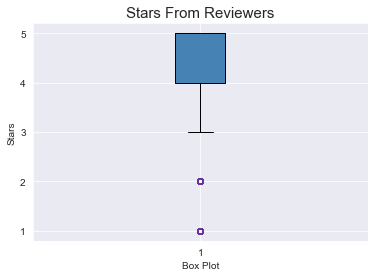

In [6]:
# Setup Boxplot

# Choose main color
c = 'steelblue'

# Define boxplot
plt.boxplot(df['overall'], patch_artist=True,
            boxprops=dict(facecolor=c, color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='cyan', markeredgecolor='rebeccapurple'),
            medianprops=dict(color='black'),
            )

# Choose labels
plt.ylabel('Stars')
plt.xlabel('Box Plot')

# Choose title
plt.title('Stars From Reviewers', fontsize=15)

plt.yticks([1,2,3,4,5])

# Save figure
plt.savefig("Star_Box_Plot", dpi=300)

# Show plot
plt.show()

Even though there are only 5 possible review scores, 2.0 and 1.0 are outliers! This is the definition of a top-heavy box. (I don't know if that's a real term.)

The bottom half of the box is missing because the max is the median.

## Overall Stars Histogram

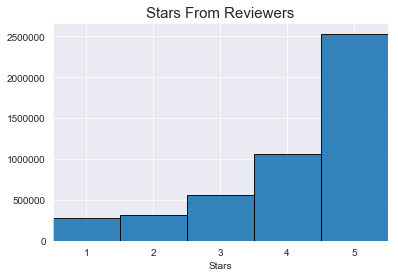

In [7]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
bins = [1,2,3,4,5,6]

plt.hist(df['overall'], bins=bins, alpha=.9, ec='black')
plt.xlabel('Stars')
plt.title('Stars From Reviewers', fontsize=15)
bins_labels(bins)
plt.savefig("Distribution_of_Stars_Hist", dpi=300)
plt.show()

The bars make a nice curve. This histogram reinforces a top-heavy rating system.

## Overall Stars ECDF

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

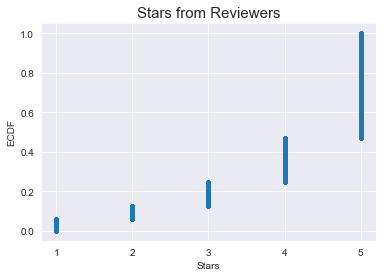

In [9]:
# Compute ECDF for star rating
x, y = ecdf(df.overall)

# Generate plot
plt.plot(x, y, marker='.', linestyle='none')

# Define xticks
plt.xticks([1,2,3,4,5])

# Label the axes
plt.xlabel('Stars')
plt.ylabel('ECDF')
plt.title('Stars from Reviewers', fontsize=15)
plt.savefig("Distribution_of_Stars_ECDF", dpi=300)
plt.show()

The ECDF is a little more telling that the histogram. The total percentage of each rating is more clear. Over half of the reviews are 5.0!

## Explore 'Helpful' Column

Converting a column of lists into usable data was trickier than expected. I used Stack Overflow and Springboard mentors to smooth out the process. I started with np_arrays.

## Total/Helpful Votes Scatter Plot

In [10]:
# Define percentage of helpful votes as one sum.
percentage_helpful = df['Helpful_Votes'].sum()/df['Total_Votes'].sum()
print('Percentage of Helpful Votes:', percentage_helpful)

Percentage of Helpful Votes: 0.7425992688008581


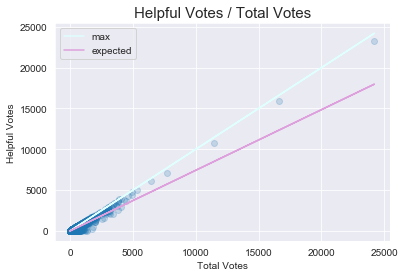

In [11]:
# Generate plot comparing helpful votes and total votes

# Define x and y
y = df['Helpful_Votes']
x = df['Total_Votes']

# Create labels
plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Helpful Votes / Total Votes', fontsize=15)

# Create plot
plt.scatter(x,y,alpha=0.2)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'lightcyan', label='max')

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, percentage_helpful*x, 'plum', label='expected')

# Create legend
plt.legend(handles=[maxLine, expectedLine])

plt.savefig("Votes_Scatter", dpi=300)

# Show plot
plt.show()

This is beautifully linear!! Data points with lots of votes are generally more helpful than expected. 

### Zoom Plot

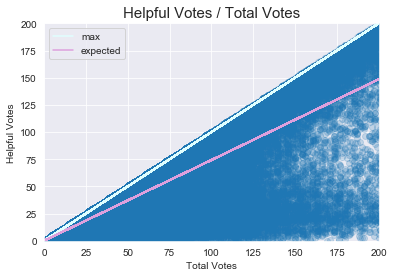

In [12]:
# Generate zoomed plot comparing helpful votes and total votes
plt.rcParams['agg.path.chunksize'] = 10000

# Define x and y
y = df['Helpful_Votes']
x = df['Total_Votes']

# Create labels
plt.ylabel('Helpful Votes')
plt.xlabel('Total Votes')
plt.title('Helpful Votes / Total Votes', fontsize=15)

# Create plot
plt.scatter(x,y,alpha=0.2)

#Since helpful votes cannot exceed total votes, the cyan line represents a maximum. 
maxLine, = plt.plot(x, x, 'lightcyan', label='max')

#The purple line is the expected value of helpful votes
expectedLine, = plt.plot(x, percentage_helpful*x, 'plum', label='expected')

# Create legend
plt.legend(handles=[maxLine, expectedLine])

# Set limits
plt.xlim(0,200)
plt.ylim(0,200)

plt.savefig("Votes_Scatter_Zoom", dpi=300)

# Show plot
plt.show()

When Total Votes are low, the data is less clear. This is very dense.

### Joint Plot

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


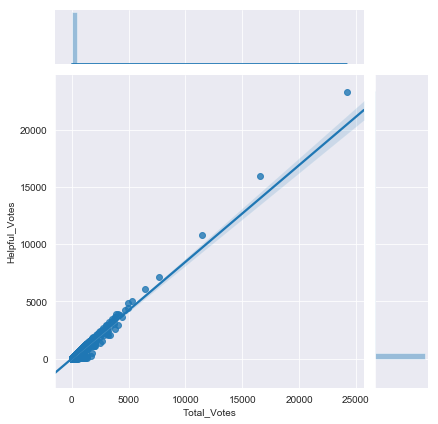

In [13]:
sns.jointplot("Total_Votes", "Helpful_Votes", data=df, kind='reg');

plt.savefig("Helpful-Total-Reg", dpi=300)

# Show plot
plt.show()

## Helpful/Unhelpful Votes Scatter Plot

I will create a plot whose points could fall anywhere. Comparing total votes to helpful votes eliminates half of the axis.

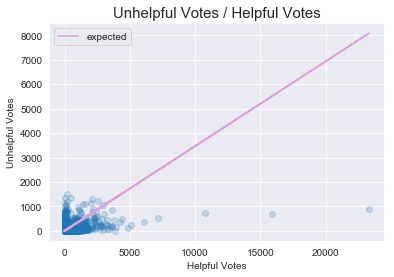

In [14]:
# Create Helpful V Unhelpful Plot
df['Unhelpful_Votes'] = df['Total_Votes'] - df['Helpful_Votes']

# Define x and y
x = df['Helpful_Votes']
y = df['Unhelpful_Votes']

plt.rcParams['agg.path.chunksize'] = 10000

# Create plot
plt.scatter(x,y, alpha=0.2)

# Create title and labels
plt.title('Unhelpful Votes / Helpful Votes', fontsize=15)
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')

# Create expected line
expectedLine, = plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'plum', label='expected')

# Define legend
plt.legend(handles=[expectedLine])

# Save figure
plt.savefig("Unhelpful_Scatter", dpi=300)

# Show plot
plt.show()

This plot is very clustered near the origin. The pattern is less clear.

### Zoom Plot

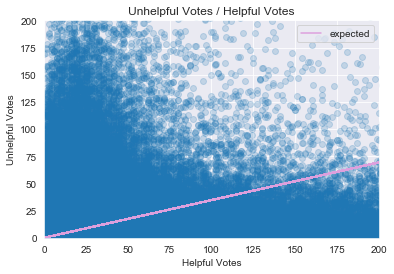

In [15]:
# Define x and y
x = df['Helpful_Votes']
y = df['Unhelpful_Votes']
       
# Prevent cell overflow
plt.rcParams['agg.path.chunksize'] = 10000

# Create scatter plot
plt.scatter(x, y, alpha=0.2)

# Define expected line
expectedLine, = plt.plot(x, (1-percentage_helpful)/percentage_helpful*x,'plum', label='expected')
plt.legend(handles=[expectedLine])
plt.xlabel('Helpful Votes')
plt.ylabel('Unhelpful Votes')
plt.title('Unhelpful Votes / Helpful Votes')
plt.xlim(0,200)
plt.ylim(0,200)
plt.savefig("Helpful-Unhelpful-Zoom", dpi=300)
plt.show()

The pattern indcates that as helpful votes go up, unhelpful votes go down.

### Joint Plot

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


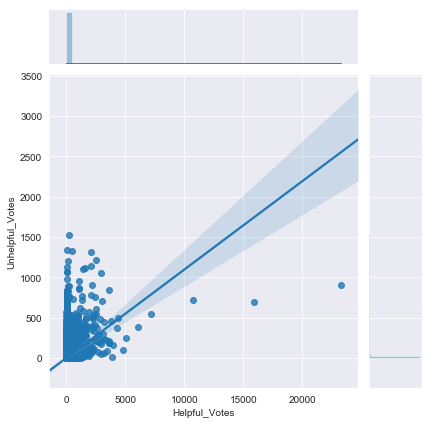

In [16]:
sns.jointplot("Helpful_Votes", "Unhelpful_Votes", data=df, kind='reg');

plt.savefig("Helpful-Unhelpful-Reg", dpi=300)

# Show plot
plt.show()

## All Histograms

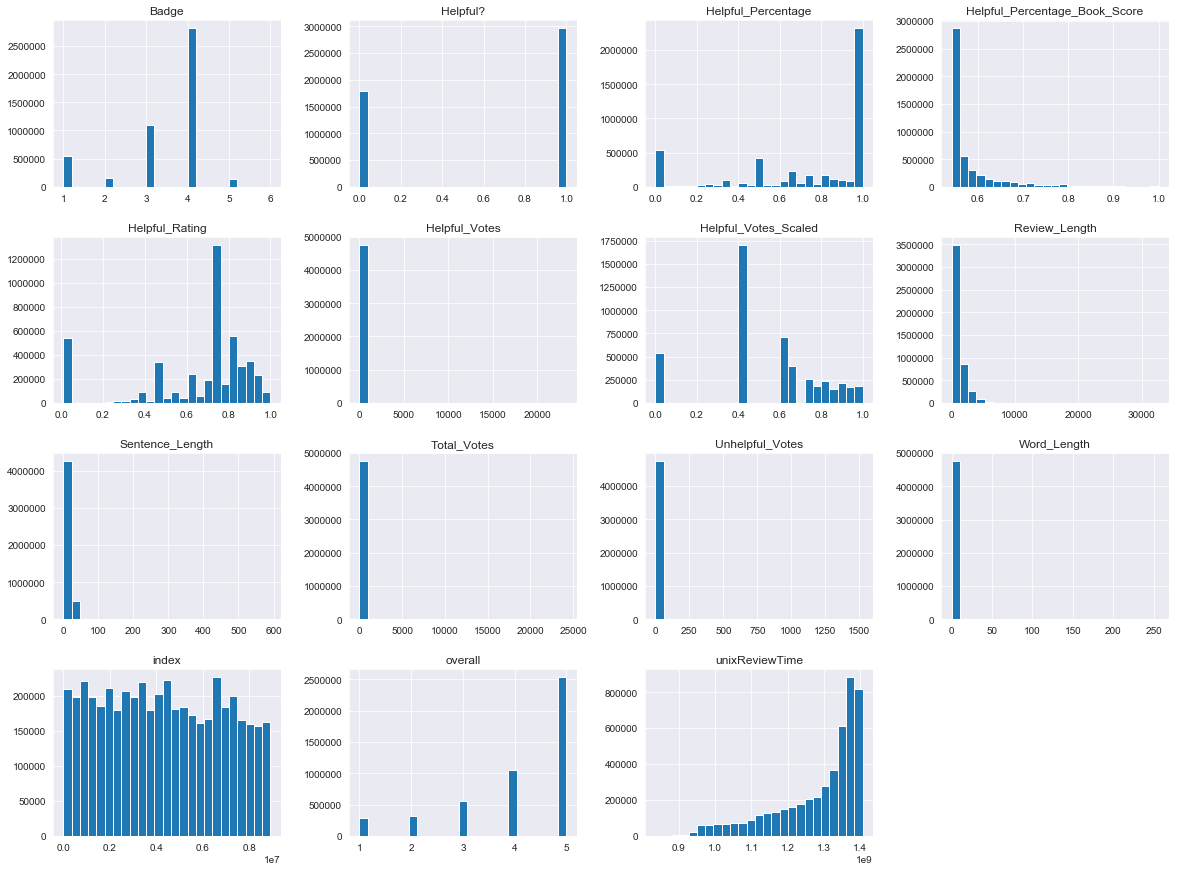

In [17]:
# Show plots inline
%matplotlib inline

#Import matplotlib
import matplotlib.pyplot as plt

# Create histograms for all numberical columns, set number of bins and size
df.hist(bins=25, figsize=(20,15))

# Show plot
plt.show()

There is a wide range of distributions. Many are very right skewed. Several graphs, like Helpful Votes, could use further examination.

### Helpful_Votes Histogram

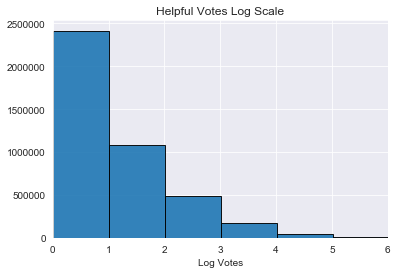

In [18]:
# Set up Helpful Votes Log Scale
log_df = df[df['Helpful_Votes']>=1]
Helpful_Votes_Log = np.log(log_df['Helpful_Votes'])

plt.hist(Helpful_Votes_Log, bins=10, alpha=.9, ec='black')
plt.title('Helpful Votes Log Scale')
plt.xlabel('Log Votes')
plt.xlim(0,6)
plt.savefig("Helpful_Votes_Log_Scale", dpi=300)
plt.show()

### Review_Length Histogram

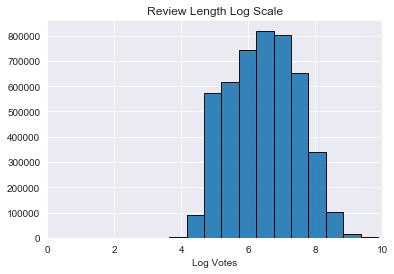

In [19]:
#Set up Review Length Log Scale
Review_Length_Log = np.log(df['Review_Length'])

# Create Review Length Histogram
plt.hist(Review_Length_Log, bins=20, alpha=.9, ec='black')
plt.title('Review Length Log Scale')
plt.xlabel('Log Votes')
plt.xlim(0,10)

# Save and Displkay
plt.savefig("Review_Length_Log_Scale", dpi=300)
plt.show()

### Word_Length Histogram

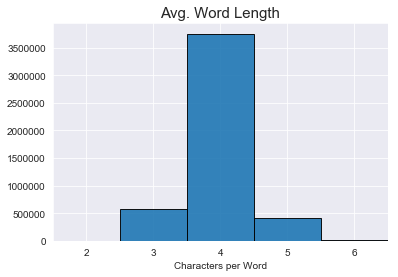

In [20]:
# Set up Word_Length Histogram
bins = [2,3,4,5,6,7]
plt.hist(df['Word_Length'], bins=bins, alpha=.9, ec='black')
plt.xlabel('Characters per Word')
plt.title('Avg. Word Length', fontsize=15)
bins_labels(bins)
plt.savefig("Avg_Word_Length_Hist", dpi=300)
plt.show()

### Sentence_Length Histogram

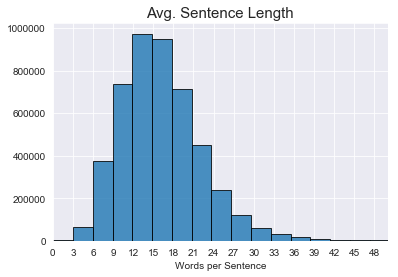

In [21]:
# Set up Sentence_Length Histogram
plt.hist(df['Sentence_Length'], bins=200, alpha=0.8, ec='black')
plt.xlabel('Words per Sentence')
plt.xlim(0,50)
plt.xticks(np.linspace(0,48,17))
plt.title('Avg. Sentence Length', fontsize=15)
plt.savefig("Avg_Sentence_Length_Hist", dpi=300)
plt.show()

## Helpful_Rating

### Correlation Matrix

In [22]:
corr_matrix = df.corr()
corr_matrix['Helpful_Rating'].sort_values(ascending=False)

Helpful_Rating                   1.000000
Badge                            0.962921
Helpful_Percentage               0.938691
Helpful_Votes_Scaled             0.807941
Helpful?                         0.765614
Helpful_Percentage_Book_Score    0.338584
Review_Length                    0.190890
overall                          0.166213
Helpful_Votes                    0.153557
Sentence_Length                  0.123556
Word_Length                      0.120912
Total_Votes                      0.114385
index                            0.043665
Unhelpful_Votes                 -0.073119
unixReviewTime                  -0.154979
Name: Helpful_Rating, dtype: float64

Review_Length, Sentence_Length, Word_Length and overall should all be considered as they had nothing to do with the creation of the Helpful_Rating column.

### Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121318358>,
      dtype=object)

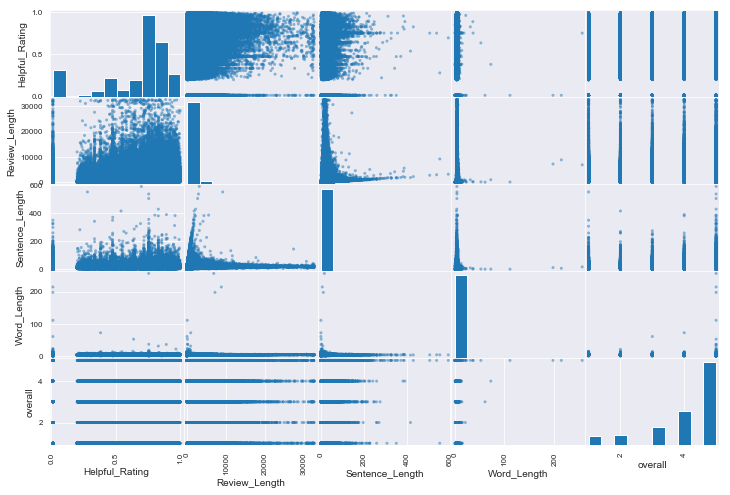

In [23]:
from pandas.plotting import scatter_matrix

attributes = ['Helpful_Rating', 'Review_Length', 'Sentence_Length', 'Word_Length', 'overall']
scatter_matrix(df[attributes], figsize=(12,8))

## Summary

I am looking for criteria to rank the helpfulness of reviews and reviewers. The next logical step is to group the data by reviewerID and look for any trends. The data clearly shows that users are more likely to vote for a review if they find it helpful. This should prove instrumental for training data to determine the helpfulness of a given review.

## Questions Going Forward

1) What other criterion can be used to determine the helpfulness of reviews?

2) What model can I create to generate a single number to rank how helpful reviews are?

3) What trends will grouping by reviewerID reveal?

4) What will grouping by time series stamp reveal?

5) Are the words themselves, or sentence length of each review worth examining?

## Model Notes

I have been operating under the assumption that the data is honest. This may not be the case. There is a wealth of information online targeting "fake" reviews (references forthcoming). What determines a fake review? While there is no clear blueprint, here are some initial ideas:

1) Brief reviews.

2) All reviews written in a very short timeframe.

3) Indicative language (more research needed).

There also a spectrum here. Emotional reviews, dishonest reviews, subjective reviews, provacative reviews, objective reviews, paid reviews, reviews with an agenda, etc.

It may difficult to ferret all of these outs. However, it is possible to construct a model that identifies the patterns of reviewers and ranks them accordingly.

1) Percentage of helpfulness.
2) Duration of account since first review.
3) Account activity.
4) Mean review score. 

These will each be reviewed going forward.